# Setup

In [1]:
!pip install opendatasets
!cp -r /content/drive/MyDrive/DATA4380-project/datasetload.py /content/datasetload.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import datasetload
import opendatasets as od
import PIL
import glob
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [3]:
def vgg_model(IMAGE_SIZE = (227,227,3), DENSE_N_NEURONS = 3):

    #Based on model from https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

    model = Sequential([
        Conv2D(input_shape = IMAGE_SIZE, filters=16,kernel_size=(3,3),padding="same", activation="relu"),
        Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"),
        MaxPool2D(pool_size=(2,2),strides=(2,2)),
        Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
        MaxPool2D(pool_size=(2,2),strides=(2,2)),
        Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
        MaxPool2D(pool_size=(2,2),strides=(2,2)),
        Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        MaxPool2D(pool_size=(2,2),strides=(2,2)),
        Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        MaxPool2D(pool_size=(2,2),strides=(2,2)),
        Flatten(),
        Dense(units=2048,activation="relu"),
        Dense(units=4096,activation="relu"),
        Dense(units=512, activation="relu"),
        Dense(units=256, activation="relu"),
        Dense(units=120, activation="relu"),
        Dense(units=24, activation="relu"),
        Dense(DENSE_N_NEURONS, activation="softmax"),
        ])
        
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    
    return model

# Model 1: Rock Paper Scissors

In [3]:
image_train, label_train, image_test, label_test = datasetload.fetch_rps(shuffle = True, random_state = 732, train_size = 0.85)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
model1 = datasetload.vgg_model((200,300,3))

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 300, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 300, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 150, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 150, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 75, 32)       0         
 2D)                                                    

In [14]:
history = model1.fit(image_train, label_train, epochs = 20)

Epoch 1/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0985 - accuracy: 0.3437
Epoch 2/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0985 - accuracy: 0.3437
Epoch 3/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0985 - accuracy: 0.3437
Epoch 4/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0984 - accuracy: 0.3437
Epoch 5/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0984 - accuracy: 0.3437
Epoch 6/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0984 - accuracy: 0.3437
Epoch 7/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0984 - accuracy: 0.3437
Epoch 8/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0984 - accuracy: 0.3437
Epoch 9/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0984 - accuracy: 0.3437
Epoch 10/20
59/59 [==============================] - 1s 23ms/step - loss: 1.0984 - accuracy: 0.3437
Epoch 11/

In [15]:
history.history

{'loss': [1.0984543561935425,
  1.0985249280929565,
  1.0984938144683838,
  1.0984007120132446,
  1.0983591079711914,
  1.0983883142471313,
  1.0983774662017822,
  1.0983997583389282,
  1.0984084606170654,
  1.0984089374542236,
  1.0984439849853516,
  1.098408818244934,
  1.0983645915985107,
  1.098333477973938,
  1.098388433456421,
  1.0984035730361938,
  1.0984033346176147,
  1.0983656644821167,
  1.0983507633209229,
  1.0984245538711548],
 'accuracy': [0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334,
  0.34373319149017334]}

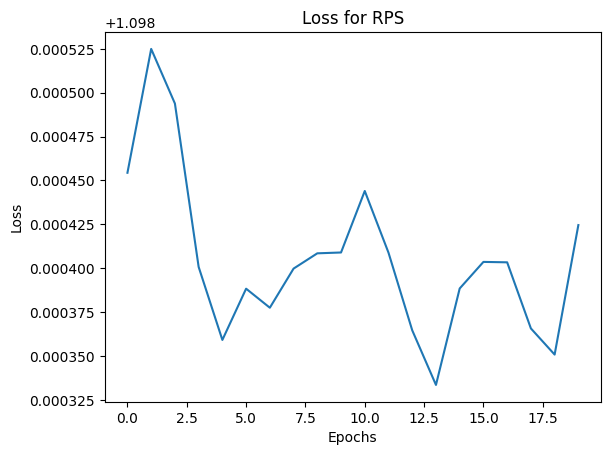

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title("Loss for RPS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [16]:
scores = model1.evaluate(image_test, label_test)
print(scores)

11/11 [==============================] - 0s 13ms/step - loss: 1.0993 - accuracy: 0.3374
[1.0992664098739624, 0.33738601207733154]


In [51]:
from sklearn.metrics import precision_score, f1_score, recall_score

y_pred = model1.predict(image_test)

y_pred_classes = np.argmax(y_pred, axis=1)
label_test_classes = np.argmax(label_test, axis = 1)

accuracy = scores[1]
type(accuracy)

precision = precision_score(label_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(label_test_classes, y_pred_classes, average='weighted')
recall = recall_score(label_test_classes, y_pred_classes, average='weighted')

headers = ["Metric", "Value"]

data = {
    "Metric": ["Accuracy", "Precision","Recall","F1"],
    "Value": [accuracy, precision, recall, f1]
}

11/11 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
pd.DataFrame(data).set_index("Metric")

,Value
Metric,
Accuracy,0.337386
Precision,0.113829
Recall,0.337386
F1,0.170227


# Model 2: Nature

In [4]:
image_train, label_train, image_test, label_test = datasetload.fetch_nature()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
image_train[0].shape

(227, 227, 3)

In [6]:
model2 = vgg_model((227,227,3), 6)

In [7]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 227, 227, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 113, 113, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 113, 113, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                    

In [8]:
history = model2.fit(image_train, label_train, epochs = 20)

Epoch 1/20
439/439 [==============================] - 20s 22ms/step - loss: 1.7915 - accuracy: 0.1754
Epoch 2/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7910 - accuracy: 0.1790
Epoch 3/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7910 - accuracy: 0.1781
Epoch 4/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7909 - accuracy: 0.1789
Epoch 5/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7910 - accuracy: 0.1790
Epoch 6/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7909 - accuracy: 0.1790
Epoch 7/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7909 - accuracy: 0.1790
Epoch 8/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7909 - accuracy: 0.1790
Epoch 9/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7910 - accuracy: 0.1790
Epoch 10/20
439/439 [==============================] - 9s 20ms/step - loss: 1.7909 - accur

In [9]:
history.history

{'loss': [1.7915085554122925,
  1.7910329103469849,
  1.7910223007202148,
  1.790936827659607,
  1.790972352027893,
  1.7909456491470337,
  1.7909475564956665,
  1.79091477394104,
  1.790977120399475,
  1.7909340858459473,
  1.790939211845398,
  1.790953278541565,
  1.7909690141677856,
  1.790950059890747,
  1.7909959554672241,
  1.7909200191497803,
  1.7909423112869263,
  1.790982723236084,
  1.7909311056137085,
  1.7909324169158936],
 'accuracy': [0.175359845161438,
  0.17899386584758759,
  0.17813880741596222,
  0.1789226233959198,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759,
  0.17899386584758759]}

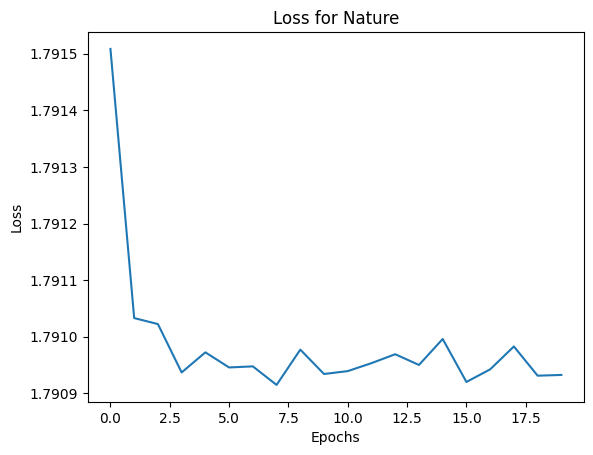

In [10]:
plt.plot(history.history['loss'])
plt.title("Loss for Nature")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [11]:
scores = model2.evaluate(image_test, label_test)
print(scores)

94/94 [==============================] - 2s 15ms/step - loss: 1.7902 - accuracy: 0.1750
[1.7902346849441528, 0.17499999701976776]


In [12]:
from sklearn.metrics import precision_score, f1_score, recall_score

y_pred = model2.predict(image_test)

y_pred_classes = np.argmax(y_pred, axis=1)
label_test_classes = np.argmax(label_test, axis = 1)

accuracy = scores[1]
type(accuracy)

precision = precision_score(label_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(label_test_classes, y_pred_classes, average='weighted')
recall = recall_score(label_test_classes, y_pred_classes, average='weighted')

headers = ["Metric", "Value"]

data = {
    "Metric": ["Accuracy", "Precision","Recall","F1"],
    "Value": [accuracy, precision, recall, f1]
}

94/94 [==============================] - 1s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
pd.DataFrame(data).set_index("Metric")

,Value
Metric,
Accuracy,0.175000
Precision,0.030625
Recall,0.175000
F1,0.052128


# Model 3: Eyes

In [15]:
image_train, label_train, image_test, label_test = datasetload.fetch_eyes()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
image_train[0].shape

(224, 224, 3)

In [20]:
model3 = vgg_model(image_train[0].shape, 4)

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                 

In [22]:
history = model3.fit(image_train, label_train, epochs = 20)

Epoch 1/20
78/78 [==============================] - 4s 26ms/step - loss: 1.3950 - accuracy: 0.2801
Epoch 2/20
78/78 [==============================] - 2s 19ms/step - loss: 1.3875 - accuracy: 0.2537
Epoch 3/20
78/78 [==============================] - 2s 20ms/step - loss: 1.3867 - accuracy: 0.2497
Epoch 4/20
78/78 [==============================] - 2s 20ms/step - loss: 1.3866 - accuracy: 0.2424
Epoch 5/20
78/78 [==============================] - 2s 20ms/step - loss: 1.3865 - accuracy: 0.2497
Epoch 6/20
78/78 [==============================] - 2s 20ms/step - loss: 1.3866 - accuracy: 0.2432
Epoch 7/20
78/78 [==============================] - 2s 20ms/step - loss: 1.3865 - accuracy: 0.2497
Epoch 8/20
78/78 [==============================] - 2s 20ms/step - loss: 1.3865 - accuracy: 0.2497
Epoch 9/20
78/78 [==============================] - 2s 19ms/step - loss: 1.3865 - accuracy: 0.2497
Epoch 10/20
78/78 [==============================] - 2s 20ms/step - loss: 1.3865 - accuracy: 0.2497
Epoch 11/

In [23]:
history.history

{'loss': [1.3950378894805908,
  1.3875389099121094,
  1.3867253065109253,
  1.3865551948547363,
  1.3864802122116089,
  1.3865656852722168,
  1.386489748954773,
  1.3864831924438477,
  1.3864598274230957,
  1.3864896297454834,
  1.3864434957504272,
  1.386475920677185,
  1.3865827322006226,
  1.3866535425186157,
  1.3866246938705444,
  1.3866195678710938,
  1.386551856994629,
  1.3865355253219604,
  1.3864930868148804,
  1.3864972591400146],
 'accuracy': [0.28009727597236633,
  0.2537494897842407,
  0.24969598650932312,
  0.2423996776342392,
  0.24969598650932312,
  0.24321037530899048,
  0.24969598650932312,
  0.24969598650932312,
  0.24969598650932312,
  0.24969598650932312,
  0.24969598650932312,
  0.24807459115982056,
  0.24321037530899048,
  0.23307661712169647,
  0.23550871014595032,
  0.23267126083374023,
  0.24402107298374176,
  0.24766923487186432,
  0.24361573159694672,
  0.2403729259967804]}

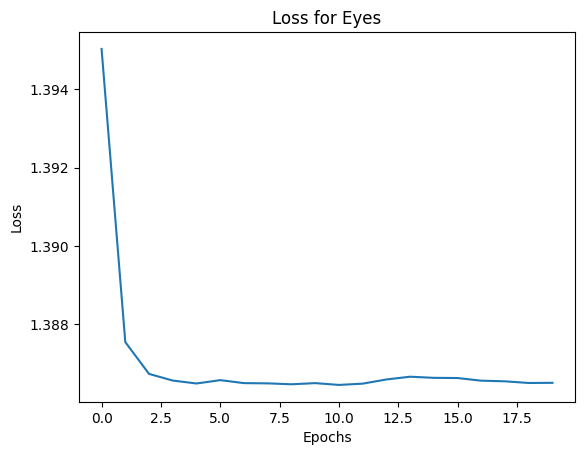

In [24]:
plt.plot(history.history['loss'])
plt.title("Loss for Eyes")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [25]:
scores = model3.evaluate(image_test, label_test)
print(scores)

14/14 [==============================] - 1s 31ms/step - loss: 1.3863 - accuracy: 0.2517
[1.3862661123275757, 0.25173211097717285]


In [26]:
from sklearn.metrics import precision_score, f1_score, recall_score

y_pred = model2.predict(image_test)

y_pred_classes = np.argmax(y_pred, axis=1)
label_test_classes = np.argmax(label_test, axis = 1)

accuracy = scores[1]
type(accuracy)

precision = precision_score(label_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(label_test_classes, y_pred_classes, average='weighted')
recall = recall_score(label_test_classes, y_pred_classes, average='weighted')

headers = ["Metric", "Value"]

data = {
    "Metric": ["Accuracy", "Precision","Recall","F1"],
    "Value": [accuracy, precision, recall, f1]
}

pd.DataFrame(data).set_index("Metric")

14/14 [==============================] - 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Value
Metric,
Accuracy,0.251732
Precision,0.063369
Recall,0.251732
F1,0.101250


# Spare code

Fall back on this if the functions from datasetload.py don't work.

In [ ]:
import opendatasets as od
import PIL
import glob
import numpy as np
import sklearn

In [ ]:
#od.download("https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors") 
# downloading files directly from Kaggle, may need username and API token (accessible in kaggle.json from Profile > Account > API > "Create New Token")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jasonbard
Your Kaggle Key: ··········


100%|██████████| 306M/306M [00:17<00:00, 18.6MB/s]


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

#import os 
#os.chdir("/content/drive/My Drive")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls

'2020-07-18 (Rational choice theory draft).gdoc'
'2020-07-25 (Public opinion draft).gdoc'
'2020-08-01 (Media and Fake News).gdoc'
'2020-08-08 (Electoral College).gdoc'
'24 7 Championships.gsheet'
'24 7.gsheet'
 42.gdoc
'42 stats.gdoc'
 9-8.gdoc
'ABIDE Document.gdoc'
'ABIDEII_Composite_Phenotypic (1).gsheet'
 ABIDEII_Composite_Phenotypic.csv
 ABIDEII_Composite_Phenotypic.gsheet
'Abstract & possible poster things .gdoc'
 Accommodations.gdoc
 ACNH.gsheet
 Add.gdoc
'Adobe Scan Nov 30, 2021.pdf'
 Ads.gdoc
 Ads.gsheet
 Africa.gdoc
 Ah.gsheet
 Alan.gdoc
'Algorithm spam.gdoc'
 Allow.gsheet
 Amber.gdoc
 Andy.gdoc
'As Bs and Cs.gsheet'
 As.gsheet
'Bard 2022 Spring Undergraduate Research.gdoc'
'Bard Bibliography 1.docx'
'Bard Bibliography 1.gdoc'
'Bard choir 2-17-22.docx'
'Bard choir 2-17-22.gdoc'
'Bard choir 2-17-22olddd.docx'
'Bard Essay 1.docx'
'Bard HW1 MATH 3301.gdoc'
 Bard.MachineLearning.Lab1.Answers
'Bard POLS 2312-001 Essay 4.docx'
'Bard POLS 2312-001 Essay 4.gdoc'
'Baseball (1).gdoc'
 B

In [ ]:
rocklst, paperlst, scissorslst = glob.glob("drive/My Drive/DATA4380-project/rockpaperscissors/rock/*"), glob.glob("drive/My Drive/DATA4380-project/rockpaperscissors/paper/*"), glob.glob("drive/My Drive/DATA4380-project/rockpaperscissors/scissors/*")
#Utilizing glob to get all filenames from each of the folders

In [ ]:
#PIL.Image.open(rocklst[10])
paperlst

['drive/My Drive/DATA4380-project/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/0Og76sl5CJhbxWWx.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/0Uomd0HvOB33m47I.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/14K62H4KG1hg5qiJ.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/1uoW7QcH2qAgCTxv.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/1jHtb93pI8f6pfKo.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/0vugygEjxQJPr9yz.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/1Dfw5FRlS4h60JPX.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/1fKclJk4eBWOQSR1.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/0t08v9bAaA0mXGCQ.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/0zKU6wEhT2cDe9j0.png',
 'drive/My Drive/DATA4380-project/rockpaperscissors/paper/0RA9rcrv8iVvuDDU.png',
 'drive/My Drive/DATA4380-pr

In [ ]:
def form_array(arr):

  a = []
  arr = np.asarray(arr)

  for i in arr:
    zq = np.asarray(PIL.Image.open(i))
    a.append(zq)

  return np.array(a)/256

## Turning each list into a 4D array (n, 200, 300, 3) 
## which contains the RGB images as arrays.
## We can take each 3D array contained within the larger structure as an individual input.
## Our targets will be categorical based on the list that it came out of.

rock, paper, scissors = form_array(rocklst), form_array(paperlst), form_array(scissorslst)

KeyboardInterrupt: ignored

In [ ]:
paper[0]

IndexError: ignored

In [ ]:
labels = np.array([1]*len(rock) + [2]*len(paper) + [3]*len(scissors))
images = np.concatenate((rock,paper,scissors), axis = 0)

ValueError: ignored

In [ ]:
images

array([], dtype=float64)

## VGGNet

In [ ]:
import tensorflow as tf

model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

553467096/553467096 [==============================] - 14s 0us/step


In [ ]:
summary = model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import numpy as np
import pandas as pd

labels = pd.get_dummies(pd.Series(np.array([1]*3 + [2]*4 + [3]*5))).to_numpy()
labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers